In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

## ガウス過程

In [2]:
# RBFカーネル
def kgauss(params=[1.0, 1.0]):
    theta1, theta2 = params
    return lambda x1, x2: theta1 * np.exp(- np.sum((x1 - x2) ** 2, axis=1) / theta2) if x1.ndim > 1 else theta1 * np.exp(- np.sum((x1 - x2) ** 2, axis=0) / theta2)

In [3]:
# a = np.array([1, 2])
# b = np.array([3, 6])

# print(a.ndim)
# print((a-b)**2)
# print(np.sum((a-b)**2, axis=0))
# print(kgauss()(a,b))  # Example usage of the kernel function
# print(np.exp(- np.sum((a-b)**2, axis=0)))

### RBFカーネルの確認

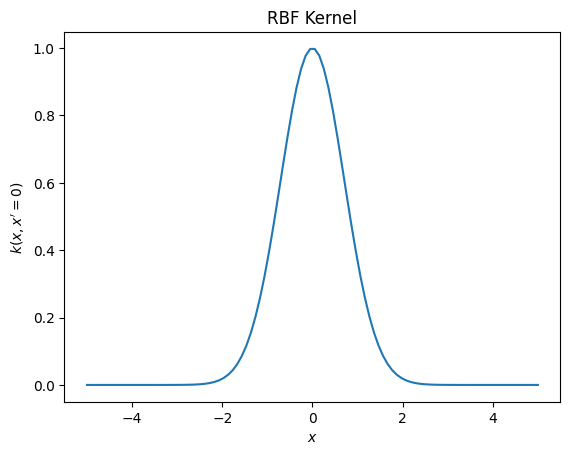

In [4]:
x1 = np.linspace(-5, 5, 100).reshape([-1, 1])
x2 = np.zeros_like(x1)
y = kgauss()(x1, x2)

fig, ax = plt.subplots()
ax.plot(x1, y)
ax.set_xlabel('$x$')
ax.set_ylabel('$k(x, x\'=0)$')
ax.set_title('RBF Kernel')
plt.show()

### ガウス過程からのサンプリング

In [5]:
def kernel_matrix(xx, kernel):
    n = xx.shape[0]
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i, j] = kernel(xx[i], xx[j])
    return K

<Axes: >

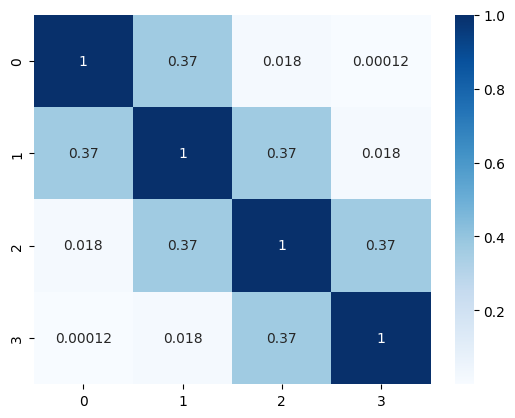

In [6]:
xx_1 = np.linspace(1, 4, 4).reshape([-1, 1])
K_1 = kernel_matrix(xx_1, kgauss())
sns.heatmap(K_1, annot=True, cmap='Blues')

In [7]:
sample_1 = np.random.normal(size=(1,4))
L_1 = np.linalg.cholesky(K_1)
yy_1 = L_1 @ sample_1.T
print(yy_1)

[[ 0.57256117]
 [-0.01901727]
 [-0.55686169]
 [-1.08736142]]


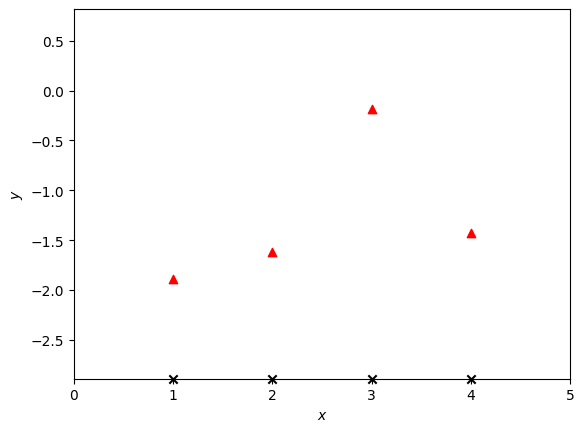

In [8]:
# ガウス過程からのサンプリング
sample_1 = np.random.normal(size=(1,4))
L_1 = np.linalg.cholesky(K_1)
yy_1 = L_1 @ sample_1.T

fig, ax = plt.subplots()
ax.scatter(xx_1, yy_1, marker='^', color='red')
ax.scatter(xx_1, np.ones_like(xx_1)*yy_1.min()-1, marker='x', color='black', clip_on=False)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_ylim(yy_1.min()-1, yy_1.max() + 1)
ax.set_xlim(0, 5)
plt.show()

In [9]:
def plot_sample_heatmap(xx, yy, K):
    fig, axes = plt.subplots(1,2, figsize=(8, 4))

    axes[0].scatter(xx, yy, marker='^', color='red')
    axes[0].scatter(xx, np.ones_like(xx)*yy.min()-1, marker='x', color='black', clip_on=False)
    axes[0].set_xlabel('$x$')
    axes[0].set_ylabel('$y$')
    axes[0].set_ylim(yy.min()-1, yy.max() + 1)
    axes[0].set_xlim(0, 5)
    axes[0].set_aspect('equal')

    sns.heatmap(K, annot=False, cmap='Blues', ax=axes[1])
    axes[1].set_aspect('equal')

    plt.show()

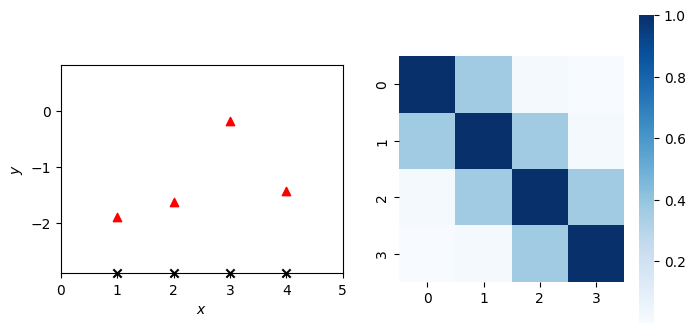

In [10]:
plot_sample_heatmap(xx_1, yy_1, K_1)

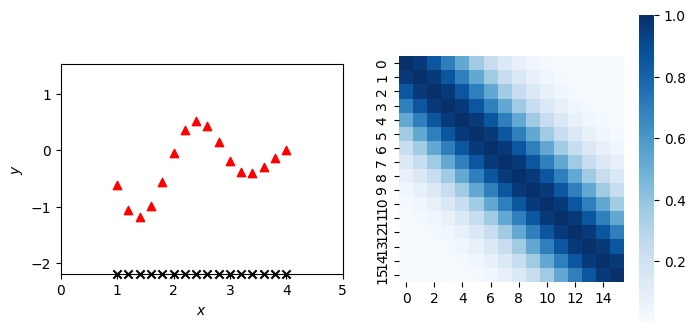

In [11]:
xx_2 = np.linspace(1, 4, 16).reshape([-1, 1])
K_2 = kernel_matrix(xx_2, kgauss())
sample_2 = np.random.normal(size=(1,16))
L_2 = np.linalg.cholesky(K_2)
yy_2 = L_2 @ sample_2.T

plot_sample_heatmap(xx_2, yy_2, K_2)

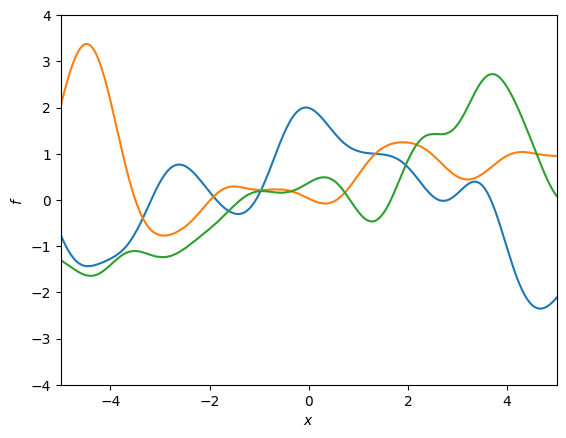

In [12]:
# 1次元の平均0のガウス過程からのサンプリング
def sample_1d(kernel, n_samples, n_points, epsilon = 1e-6):
    xx = np.linspace(-5, 5, n_points).reshape([-1, 1])
    K = kernel_matrix(xx, kernel)
    K_stable = K + epsilon * np.eye(K.shape[0]) # 対角成分に小さな値を加えて計算を安定化(正定値になるようにする)
    sample = np.random.normal(size=(n_samples, n_points))
    # L = np.linalg.cholesky(K)
    L = np.linalg.cholesky(K_stable)
    yy = L @ sample.T
    return xx, yy

xx_1d, yy_1d = sample_1d(kgauss(), n_samples=3, n_points=201)

fig, ax = plt.subplots()
for i in range(yy_1d.shape[1]):
    ax.plot(xx_1d, yy_1d[:, i])
ax.set_xlabel('$x$')
ax.set_ylabel('$f$')
ax.set_xlim(-5, 5)
ax.set_ylim(-4, 4)
plt.show()

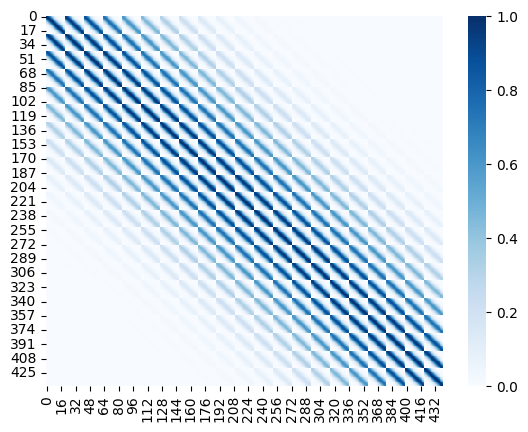

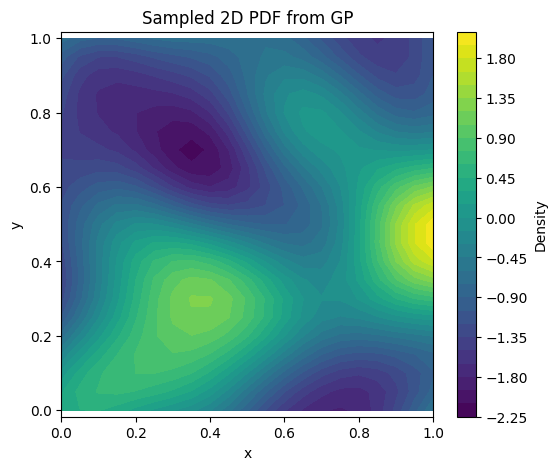

In [38]:
# 2次元の平均0のガウス過程からのサンプリング
def sample_2d(kernel, n_samples, n_points, epsilon = 1e-6):
    xx1 = np.linspace(0, 1, n_points)
    xx2 = np.linspace(0, 1, n_points)
    XX1, XX2 = np.meshgrid(xx1, xx2)
    grid_points = np.hstack([XX1.reshape(-1, 1), XX2.reshape(-1, 1)])
    K = kernel_matrix(grid_points, kernel)
    K_stable = K + epsilon * np.eye(K.shape[0]) # 対角成分に小さな値を加えて計算を安定化(正定値になるようにする)
    sns.heatmap(K_stable, cmap='Blues')

    sample = np.random.normal(size=(n_samples, grid_points.shape[0]))
    # L = np.linalg.cholesky(K)
    L = np.linalg.cholesky(K_stable)
    yy_2d = L @ sample.T

    return grid_points, yy_2d

n_points = 21
n_samples = 1
params = [1.0, 0.04/0.5]  # RBFカーネルのパラメータ
grid_points_2d, yy_2d = sample_2d(kgauss(params), n_samples, n_points)
fig = go.Figure(data=go.Surface(
    z=yy_2d.reshape(n_points, n_points), 
    x=grid_points_2d[:, 0].reshape(n_points, n_points), 
    y=grid_points_2d[:, 1].reshape(n_points, n_points), 
    colorscale='viridis'))
fig.update_layout(scene=dict(xaxis_title='x1', yaxis_title='x2', zaxis_title='f'), width=700, height=700)
fig.show()

# 可視化
plt.figure(figsize=(6, 5))
plt.contourf(grid_points_2d[:, 0].reshape(n_points, n_points), 
             grid_points_2d[:, 1].reshape(n_points, n_points), 
             yy_2d.reshape(n_points, n_points), 
             levels=30, cmap='viridis')
plt.colorbar(label='Density')
plt.title("Sampled 2D PDF from GP")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.show()

## 様々なカーネル

## ガウス過程回帰モデル

## ガウス過程回帰のハイパーパラメータ推定

## ガウス過程回帰の一般化